# Modelos de boosting

Lucas Roberto
Francisco Dias

PREDICT-ICMC

Fevereiro 2022

### Conjunto de dados

Para exemplificar os algoritmos de aprendizado de máquina, utilizaremos um conjunto de dados que que contém dados sobre o cancer de mama.

In [16]:
# load breast cancer data
from sklearn.datasets import load_breast_cancer

df_ = load_breast_cancer()

In [17]:
# convert to pandas dataframe
import pandas as pd

df = pd.DataFrame(df_.data, columns=df_.feature_names)

# merge dataframe with target
df['target'] = df_.target


In [18]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
# standardize data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

features = ['compactness error', 'worst area']

df_x =   scale.fit_transform(df[features])
df_y = df['target']



In [20]:
# fit gbc model
from sklearn.ensemble import GradientBoostingClassifier
fit_gbc = GradientBoostingClassifier().fit(df_x, df_y)

#fit ada model
from sklearn.ensemble import AdaBoostClassifier
fit_ada = AdaBoostClassifier().fit(df_x, df_y)


In [21]:
import itertools
import numpy as np

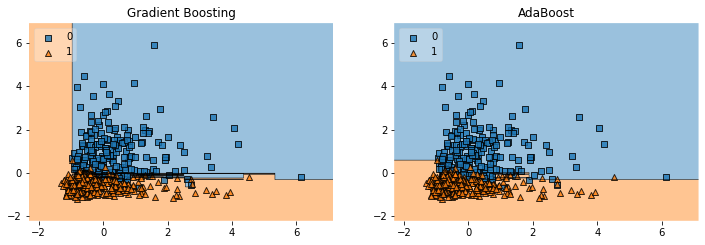

In [22]:


# Plotting decision regions


fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(2, 2)

labels = ['Gradient Boosting', 'AdaBoost']


for clf, lab, grd in zip([fit_gbc, fit_ada], labels,
                         itertools.product([0, 1],
                         repeat=2)):

    clf.fit(df_x, df_y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=df_x, y=np.array(df_y), clf=clf, legend=2)
    plt.title(lab)

plt.show()



In [41]:
# confusion matrix of both models
from sklearn.metrics import confusion_matrix

[confusion_matrix(df_y, fit_gbc.predict(df_x)),
confusion_matrix(df_y, fit_ada.predict(df_x))]


[array([[206,   6],
        [  1, 356]], dtype=int64),
 array([[195,  17],
        [ 11, 346]], dtype=int64)]

## Com o pycaret

In [23]:
# pycaret classifier
from pycaret.classification import *

clf = setup(data=df, target='target', session_id=42, silent=True)

,Description,Value
0,session_id,42
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9697,0.9910,0.9960,0.9585,0.9765,0.9341,0.9368,0.0590
et,Extra Trees Classifier,0.9621,0.9930,0.9878,0.9544,0.9705,0.9177,0.9198,0.1930
catboost,CatBoost Classifier,0.9596,0.9922,0.9798,0.9574,0.9682,0.9129,0.9142,3.8120
lda,Linear Discriminant Analysis,0.9573,0.9901,0.9960,0.9403,0.9670,0.9067,0.9108,0.0110
qda,Quadratic Discriminant Analysis,0.9570,0.9913,0.9635,0.9679,0.9654,0.9086,0.9098,0.0250
lightgbm,Light Gradient Boosting Machine,0.9547,0.9895,0.9798,0.9497,0.9643,0.9023,0.9039,0.0680
gbc,Gradient Boosting Classifier,0.9546,0.9876,0.9717,0.9568,0.9639,0.9027,0.9041,0.1080
ridge,Ridge Classifier,0.9496,0.0000,0.9798,0.9431,0.9606,0.8908,0.8939,0.0120
rf,Random Forest Classifier,0.9472,0.9890,0.9678,0.9491,0.9582,0.8865,0.8874,0.2100
nb,Naive Bayes,0.9396,0.9852,0.9678,0.9392,0.9524,0.8699,0.8739,0.0130


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [25]:
# fit gbc   
gbc = create_model('gbc')

# fit adaboost
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,0.9973,1.0000,0.9259,0.9615,0.8904,0.8958
2,0.9750,0.9707,1.0000,0.9615,0.9804,0.9459,0.9473
3,0.9500,0.9787,0.9600,0.9600,0.9600,0.8933,0.8933
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9750,0.9973,1.0000,0.9615,0.9804,0.9459,0.9473
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9500,0.9947,1.0000,0.9259,0.9615,0.8904,0.8958
8,0.9744,0.9829,1.0000,0.9615,0.9804,0.9434,0.9449
9,0.9231,0.9889,1.0000,0.8889,0.9412,0.8312,0.8433


In [26]:
# tune models

tuned_gbc = tune_model(gbc)
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9750,1.0000,0.9600,1.0000,0.9796,0.9474,0.9487
1,0.9500,1.0000,1.0000,0.9259,0.9615,0.8904,0.8958
2,0.9000,0.9493,0.9200,0.9200,0.9200,0.7867,0.7867
3,0.9750,0.9813,1.0000,0.9615,0.9804,0.9459,0.9473
4,0.9500,0.9973,0.9600,0.9600,0.9600,0.8933,0.8933
5,0.9750,0.9973,1.0000,0.9615,0.9804,0.9459,0.9473
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9500,0.9733,1.0000,0.9259,0.9615,0.8904,0.8958
8,0.9744,0.9829,1.0000,0.9615,0.9804,0.9434,0.9449
9,0.8974,0.9889,0.9583,0.8846,0.9200,0.7778,0.7826


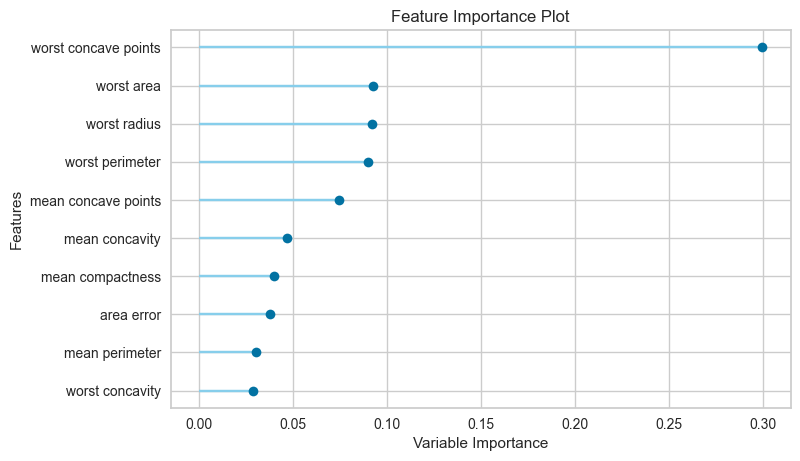

In [28]:
plot_model(tuned_gbc, plot='feature')

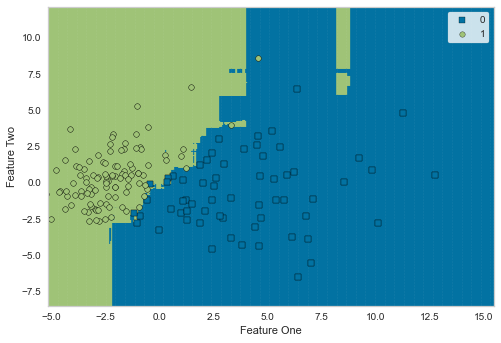

In [27]:
# decision region plot
plot_model(tuned_gbc, plot='boundary')

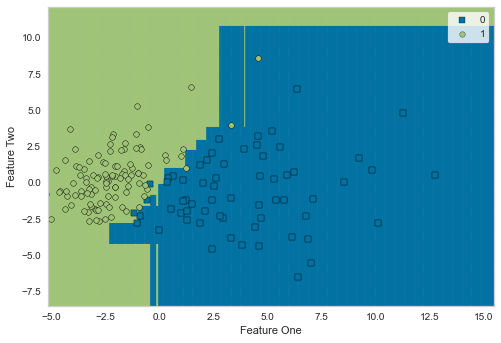

In [29]:
plot_model(tuned_ada, plot='boundary')

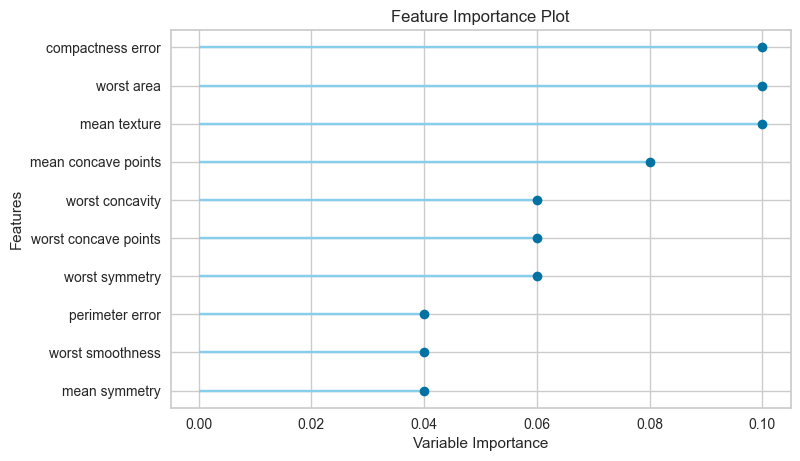

In [30]:
plot_model(tuned_ada, plot='feature')

## Referências

    - [Pycaret](https://pycaret.org/en/latest/)
    - [scikit-learn](https://scikit-learn.org/)
    